In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ola_driver_data.csv')

In [3]:
df.head()


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
#removing unwanted columns
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [5]:
df["Gender"].replace({0.0:"Male",1.0:"Female"},inplace=True)

In [6]:
df.shape

(19104, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  object 
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.9+ MB


In [8]:
#change MMM-YY  and  LastWorkingDate  to datetime format
df[['MMM-YY','Dateofjoining']] = df[['MMM-YY','Dateofjoining']].astype('datetime64[ns]')

In [9]:
#cheking null values in percentage
(df.isnull().sum()/df.shape[0])*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [10]:
df['Grade'].value_counts()

2    6627
1    5202
3    4826
4    2144
5     305
Name: Grade, dtype: int64

In [11]:
df.describe()

,Driver_ID,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [12]:
#num of drivers for our observation
df['Driver_ID'].nunique()

2381

In [13]:
df.head(15)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,Male,C23,2,57387,2018-12-24,NaN,1,1,2381060,2
1,2019-02-01,1,28.0,Male,C23,2,57387,2018-12-24,NaN,1,1,-665480,2
2,2019-03-01,1,28.0,Male,C23,2,57387,2018-12-24,03/11/19,1,1,0,2
3,2020-11-01,2,31.0,Male,C7,2,67016,2020-11-06,NaN,2,2,0,1
4,2020-12-01,2,31.0,Male,C7,2,67016,2020-11-06,NaN,2,2,0,1
5,2019-12-01,4,43.0,Male,C13,2,65603,2019-12-07,NaN,2,2,0,1
6,2020-01-01,4,43.0,Male,C13,2,65603,2019-12-07,NaN,2,2,0,1
7,2020-02-01,4,43.0,Male,C13,2,65603,2019-12-07,NaN,2,2,0,1
8,2020-03-01,4,43.0,Male,C13,2,65603,2019-12-07,NaN,2,2,350000,1
9,2020-04-01,4,43.0,Male,C13,2,65603,2019-12-07,27/04/20,2,2,0,1


### Visualization to just get a vague understanding of data before preprocessing using pairplot

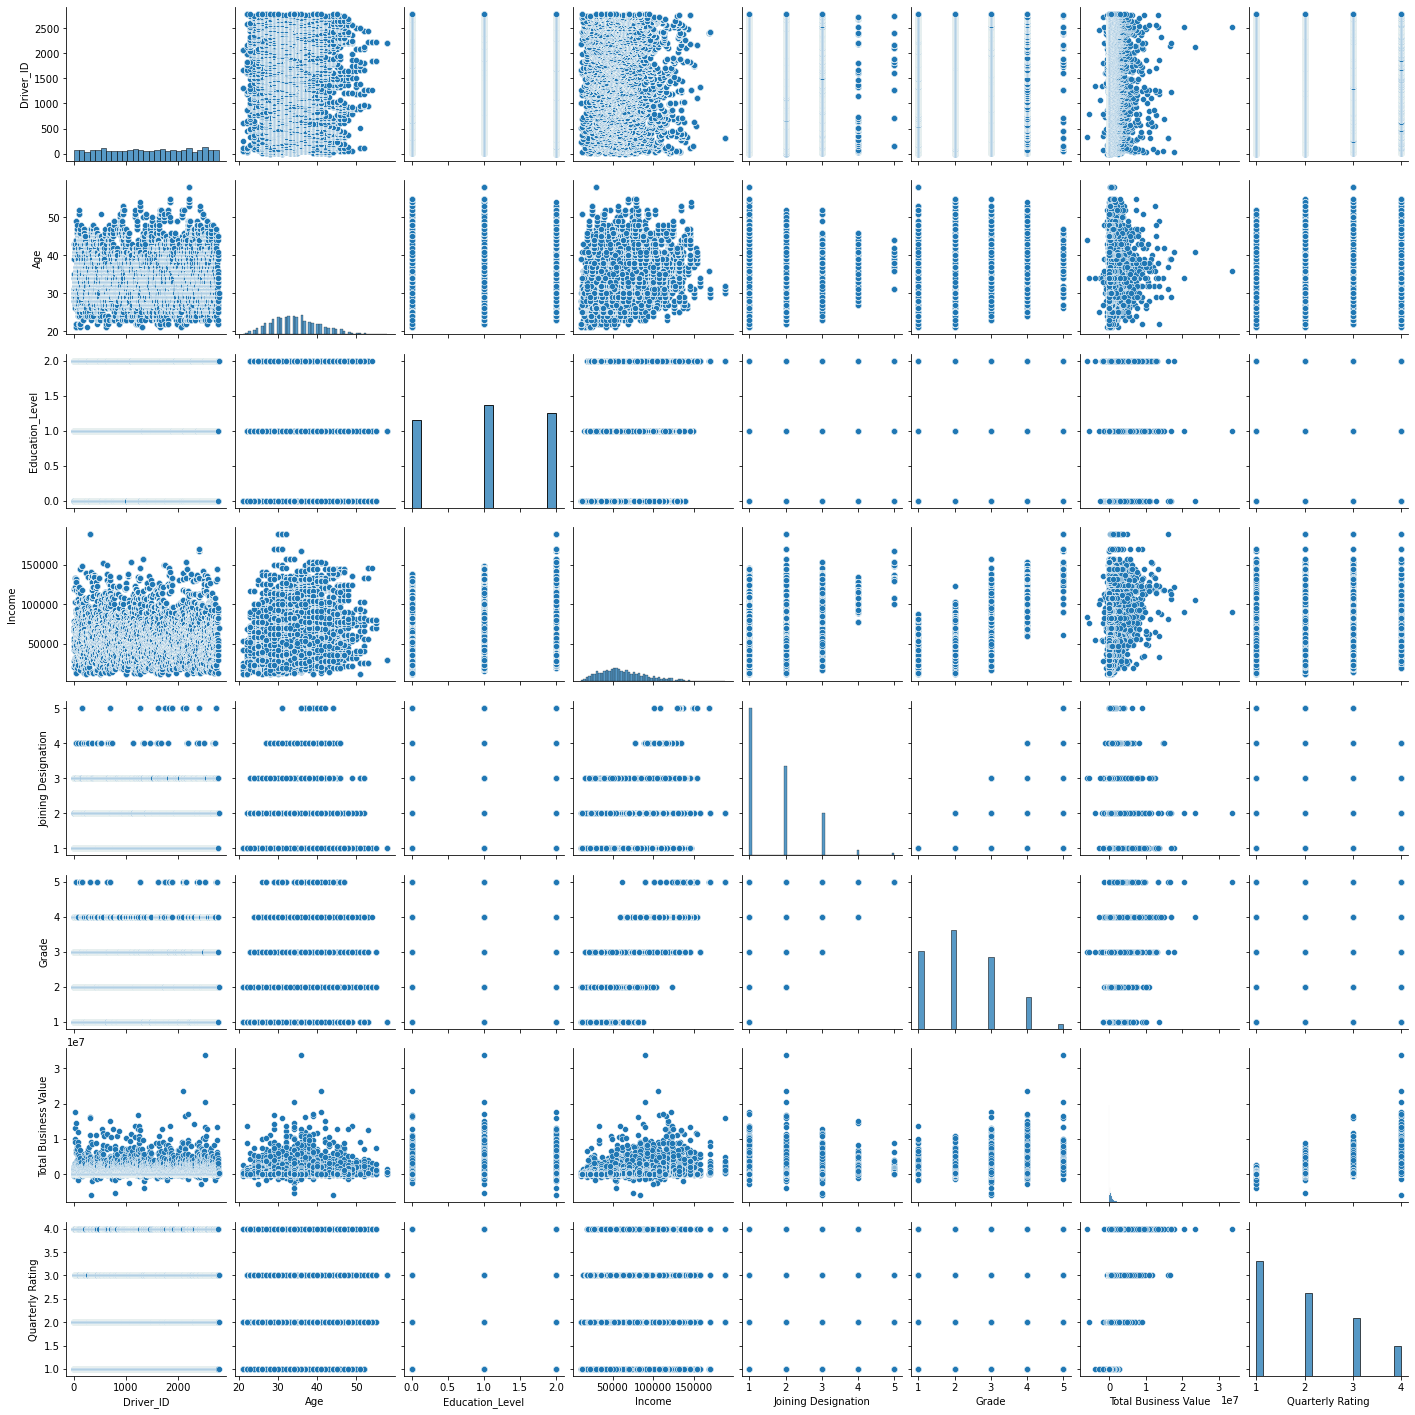

In [14]:
sns.pairplot(data = df)

### PreProcessing the DataFrame

In [15]:
agg_df  = df.groupby(["Driver_ID"]).aggregate(
{'MMM-YY': len,
    "Age": max,
    "City": lambda x: x.mode(),
    "Education_Level": max,
    "Income": np.mean,
    "Dateofjoining": lambda x: x.mode(),
    "Joining Designation": lambda x: x.mode(),
    "Grade": np.mean,
    "Total Business Value": sum,
    "Quarterly Rating": np.mean})

In [16]:
agg_df.reset_index()

,Driver_ID,MMM-YY,Age,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000
1,2,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000
2,4,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000
3,5,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000
4,6,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000
2377,2785,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000
2378,2786,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667
2379,2787,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000


In [17]:
final_df = agg_df.rename(columns={"MMM-YY":"No_of_records",
                      "Dateofjoining":"Date_of_joining",
                      "Joining Designation":"Joining_Designation",
                      "Total Business Value" : "Total_Business_Value",
                      "Quarterly Rating":"Quarterly_Rating"})

In [18]:
# taking the last working date using group,unique and apply functions in a single row and merge with final_df
final_df = pd.merge(left = df.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x:x[-1]),
        right = final_df,
         on = "Driver_ID",
         how="outer"
    )

In [19]:
final_df = pd.merge(left = df.groupby(["Driver_ID"])["Gender"].unique().apply(lambda x:x[-1]),
        right = final_df,
         on = "Driver_ID",
         how="outer"
    )

In [20]:
final_df

,Gender,LastWorkingDate,No_of_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
Driver_ID,,,,,,,,,,,,
1,Male,03/11/19,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000
2,Male,NaN,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000
4,Male,27/04/20,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000
5,Male,03/07/19,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000
6,Female,NaN,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
2784,Male,NaN,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000
2785,Female,28/10/20,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000
2786,Male,22/09/19,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667


In [21]:
data = final_df.copy()

In [22]:
data.head()

,Gender,LastWorkingDate,No_of_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
Driver_ID,,,,,,,,,,,,
1,Male,03/11/19,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.0
2,Male,NaN,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.0
4,Male,27/04/20,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.0
5,Male,03/07/19,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.0
6,Female,NaN,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.6


In [23]:
data["Churn"] = data["LastWorkingDate"].fillna(0)

In [24]:
def apply_0_1(y):
    if y == 0:
        return 0
    if y != 0:
        return 1


In [25]:
data["Churn"] = data["Churn"].apply(apply_0_1)

In [26]:
data["Churn"].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

In [27]:
data["Churn"].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: Churn, dtype: float64

### -   Driviers who churned (class 1) 68%
### -   Driviers who have not churned (class 0). 32%
### -   Data is imbalanced

### Cheking for missing values after preprocessing

In [28]:
(data.isna().sum()/len(data))*100

Gender                   1.889962
LastWorkingDate         32.129357
No_of_records            0.000000
Age                      0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Date_of_joining          0.000000
Joining_Designation      0.000000
Grade                    0.000000
Total_Business_Value     0.000000
Quarterly_Rating         0.000000
Churn                    0.000000
dtype: float64

In [29]:
#descreate values for rating
data['Quarterly_Rating'].value_counts()

1.000000    1202
2.000000     116
1.600000      88
1.750000      72
2.500000      69
            ... 
2.136364       1
2.722222       1
2.578947       1
2.857143       1
1.882353       1
Name: Quarterly_Rating, Length: 163, dtype: int64

In [30]:
### Extracting year from Date of Joining

In [31]:
data["joining_Year"] = data["Date_of_joining"].dt.year

#### Quaterly increment in rating

In [32]:
def driver_rating_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [33]:
#Cheking for any quaterly increament in the driver's rating throughout the tenure with 'df' dataframe
Quarterly_Rating_Increment = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(driver_rating_inc)

In [34]:
Quarterly_Rating_Increment

Driver_ID
1       0
2       0
4       0
5       0
6       1
       ..
2784    1
2785    0
2786    0
2787    0
2788    0
Name: Quarterly Rating, Length: 2381, dtype: int64

In [35]:
data = pd.merge(left = Quarterly_Rating_Increment,
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [36]:
data["Quarterly_Rating_Increment"] = data["Quarterly Rating"]

In [37]:
data.drop(["Quarterly Rating"],axis=1,inplace=True)

#### Quaterly increment in income

In [38]:
data

,Gender,LastWorkingDate,No_of_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_Increment
Driver_ID,,,,,,,,,,,,,,,
1,Male,03/11/19,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
2,Male,NaN,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
4,Male,27/04/20,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
5,Male,03/07/19,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
6,Female,NaN,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,Male,NaN,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2785,Female,28/10/20,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2786,Male,22/09/19,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0


In [39]:
def app_income_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [40]:
data = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income"),
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [41]:
data

,Increased_Income,Gender,LastWorkingDate,No_of_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_Increment
Driver_ID,,,,,,,,,,,,,,,,
1,0,Male,03/11/19,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
2,0,Male,NaN,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
4,0,Male,27/04/20,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
5,0,Male,03/07/19,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
6,0,Female,NaN,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,0,Male,NaN,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2785,0,Female,28/10/20,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2786,0,Male,22/09/19,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0


In [42]:
Mdata = data.copy()

In [43]:
Mdata["Gender"].replace({"Male":0,
                       "Female":1},inplace=True)

In [44]:
Mdata.head()

,Increased_Income,Gender,LastWorkingDate,No_of_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_Increment
Driver_ID,,,,,,,,,,,,,,,,
1,0,0.0,03/11/19,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.0,1,2018,0
2,0,0.0,NaN,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.0,0,2020,0
4,0,0.0,27/04/20,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.0,1,2019,0
5,0,0.0,03/07/19,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.0,1,2019,0
6,0,1.0,NaN,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.6,0,2020,1


In [45]:
Mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 1 to 2788
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Increased_Income            2381 non-null   int64         
 1   Gender                      2336 non-null   float64       
 2   LastWorkingDate             1616 non-null   object        
 3   No_of_records               2381 non-null   int64         
 4   Age                         2381 non-null   float64       
 5   City                        2381 non-null   object        
 6   Education_Level             2381 non-null   int64         
 7   Income                      2381 non-null   float64       
 8   Date_of_joining             2381 non-null   datetime64[ns]
 9   Joining_Designation         2381 non-null   int64         
 10  Grade                       2381 non-null   float64       
 11  Total_Business_Value        2381 non-null   int64       

In [46]:
Mdata["LastWorkingDate"] = Mdata["LastWorkingDate"].astype('datetime64[ns]')

In [47]:
Mdata["LastWorkingDate"] = Mdata["LastWorkingDate"].fillna(pd.to_datetime("2021-06-01"))

In [48]:
#Mdata["Driver_tenure_days"]=(Mdata["LastWorkingDate"] - Mdata["Date_of_joining"])

In [49]:
#Mdata["Driver_tenure_days"] = Mdata["Driver_tenure_days"].dt.days

In [50]:
#dropping "LastWorkingDate","Date_of_joining"
Mdata.drop(["LastWorkingDate","Date_of_joining"],inplace=True,axis = 1)

In [51]:
Mdata["Grade"] = np.round(Mdata["Grade"])

In [52]:
Mdata["Quarterly_Rating"]= Mdata["Quarterly_Rating"].round()

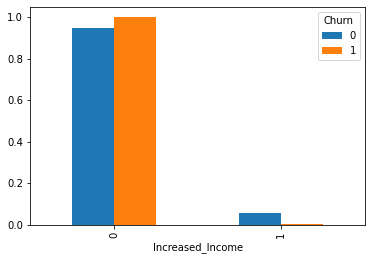

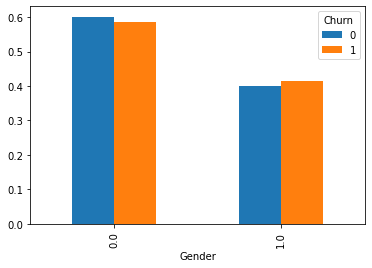

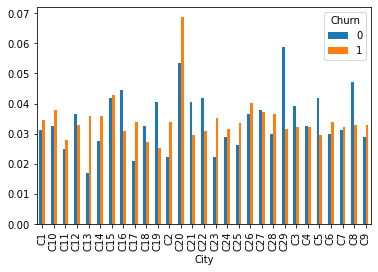

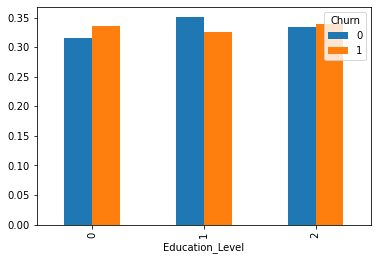

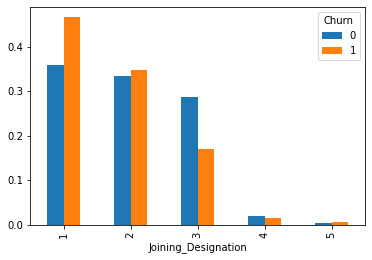

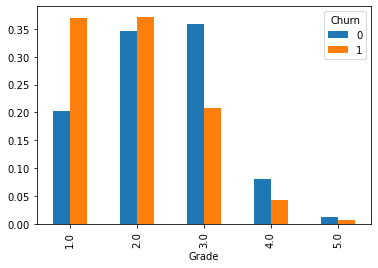

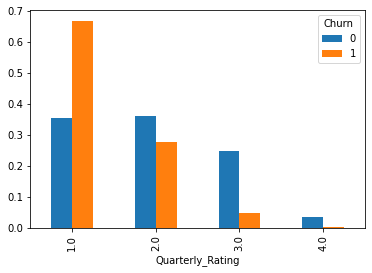

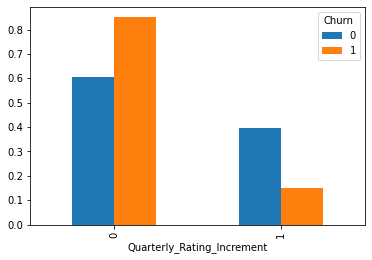

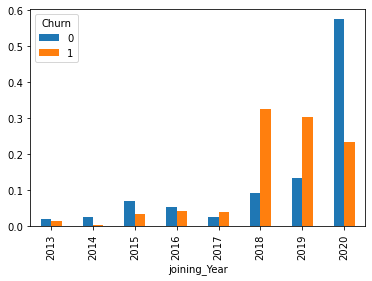

In [53]:
categorical_features = ['Increased_Income', 'Gender','City','Education_Level',
                   'Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_Increment',"joining_Year"]

for col in categorical_features:
    pd.crosstab(index = Mdata[col],
               columns = Mdata["Churn"],
               normalize="columns").plot(kind = "bar")
    plt.show()
    

In [54]:
Mdata.isna().sum()

Increased_Income               0
Gender                        45
No_of_records                  0
Age                            0
City                           0
Education_Level                0
Income                         0
Joining_Designation            0
Grade                          0
Total_Business_Value           0
Quarterly_Rating               0
Churn                          0
joining_Year                   0
Quarterly_Rating_Increment     0
dtype: int64

### Simple imputer

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
imputer  = SimpleImputer(strategy = 'most_frequent')

In [57]:
Mdata["Gender"] = imputer.fit_transform(X=Mdata["Gender"].values.reshape(-1, 1),y=Mdata["Churn"].values.reshape(-1, 1))

In [58]:
Mdata["Gender"].value_counts(dropna=False)

0.0    1425
1.0     956
Name: Gender, dtype: int64

In [59]:
Mdata.reset_index(inplace= True)

### Target Encoding

In [60]:
!pip install category_encoders

In [61]:
from category_encoders import TargetEncoder
TE = TargetEncoder()

In [62]:
Mdata["City"] = TE.fit_transform(X=Mdata["City"],y= Mdata["Churn"])

In [63]:
Mdata["joining_Year"] = TE.fit_transform(X= Mdata["joining_Year"],y= Mdata["Churn"])

<AxesSubplot:>

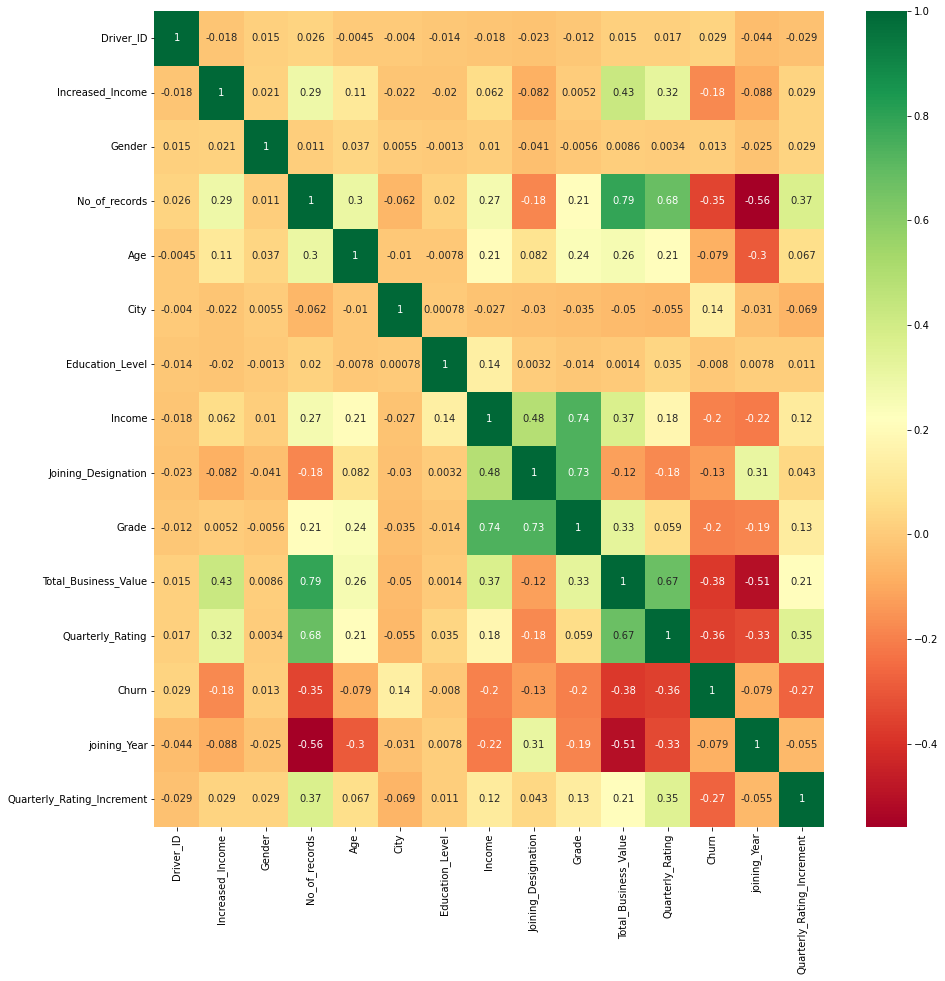

In [64]:
plt.figure(figsize=(15, 15))
sns.heatmap(Mdata.corr(),annot=True, cmap="RdYlGn")

In [65]:
X = Mdata.drop(["Driver_ID","Churn"],axis = 1)
y = Mdata["Churn"]

### KNNImputer

In [66]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)



In [67]:
X

,Increased_Income,Gender,No_of_records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,Quarterly_Rating_Increment
0,0,0.0,3,28.0,0.769859,2,57387.0,1,1.0,1715580,2.0,2018,0
1,0,0.0,2,31.0,0.684190,2,67016.0,2,2.0,0,1.0,2020,0
2,0,0.0,5,43.0,0.816064,2,65603.0,2,2.0,350000,1.0,2019,0
3,0,0.0,3,29.0,0.706553,0,46368.0,1,1.0,120360,1.0,2019,0
4,0,1.0,5,31.0,0.702829,1,78728.0,3,3.0,1265000,2.0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,0.698531,0,82815.0,2,3.0,21748820,3.0,2015,1
2377,0,1.0,3,34.0,0.706553,0,12105.0,1,1.0,0,1.0,2020,0
2378,0,0.0,9,45.0,0.570044,0,35370.0,2,2.0,2815090,2.0,2018,0
2379,0,1.0,6,28.0,0.730263,2,69498.0,1,1.0,977830,2.0,2018,0


In [68]:
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [69]:
X.describe()

,Increased_Income,Gender,No_of_records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,Quarterly_Rating_Increment
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,0.018480,0.401512,8.02352,33.663167,0.678662,1.00756,59232.460484,1.820244,2.078538,4.586742e+06,1.573289,2018.536329,0.228895
std,0.134706,0.490307,6.78359,5.983375,0.065356,0.81629,28298.214012,0.841433,0.931321,9.127115e+06,0.745987,1.609597,0.420210
min,0.000000,0.000000,1.00000,21.000000,0.531324,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,2013.000000,0.000000
25%,0.000000,0.000000,3.00000,29.000000,0.634237,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,2018.000000,0.000000
50%,0.000000,0.000000,5.00000,33.000000,0.698531,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,2019.000000,0.000000
75%,0.000000,1.000000,10.00000,37.000000,0.719430,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,2020.000000,0.000000
max,1.000000,1.000000,24.00000,58.000000,0.816064,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2020.000000,1.000000


### Train_Test_split

In [70]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train ,y_test = train_test_split(X,y,
                                                    random_state=5,
                                                    test_size=0.2)

In [71]:
y.value_counts()

1    1616
0     765
Name: Churn, dtype: int64

### Standard Scaler

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(X_train)

StandardScaler()

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Increased_Income            2381 non-null   float64
 1   Gender                      2381 non-null   float64
 2   No_of_records               2381 non-null   float64
 3   Age                         2381 non-null   float64
 4   City                        2381 non-null   float64
 5   Education_Level             2381 non-null   float64
 6   Income                      2381 non-null   float64
 7   Joining_Designation         2381 non-null   float64
 8   Grade                       2381 non-null   float64
 9   Total_Business_Value        2381 non-null   float64
 10  Quarterly_Rating            2381 non-null   float64
 11  joining_Year                2381 non-null   float64
 12  Quarterly_Rating_Increment  2381 non-null   float64
dtypes: float64(13)
memory usage: 241.

In [76]:
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

## RandomForestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [79]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='sqrt')

In [80]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.868172268907563, 0.8679245283018868)

In [81]:
RF.feature_importances_

array([0.00670651, 0.0003882 , 0.28684545, 0.0143361 , 0.01766694,
       0.00095232, 0.02534703, 0.0230438 , 0.01696966, 0.14646966,
       0.09284034, 0.32094764, 0.04748635])

In [82]:
X.columns

Index(['Increased_Income', 'Gender', 'No_of_records', 'Age', 'City',
       'Education_Level', 'Income', 'Joining_Designation', 'Grade',
       'Total_Business_Value', 'Quarterly_Rating', 'joining_Year',
       'Quarterly_Rating_Increment'],
      dtype='object')

<AxesSubplot:>

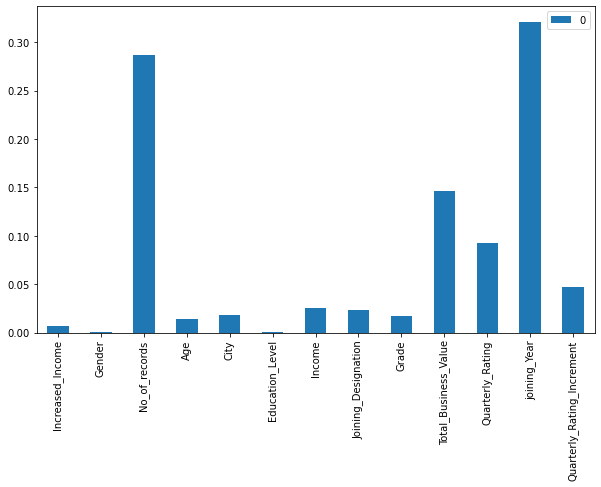

In [83]:
pd.DataFrame(data =RF.feature_importances_,
            index=X.columns).plot(kind = 'bar',figsize=(10,6))

In [84]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix

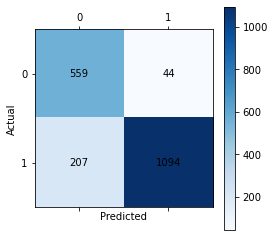

In [85]:
cm = confusion_matrix(y_train, RF.predict(X_train))

# Plot the confusion matrix with values displayed in each cell
plt.matshow(cm, cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

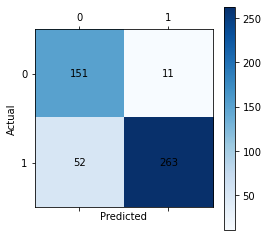

In [86]:
cm = confusion_matrix(y_test, RF.predict(X_test))

# Plot the confusion matrix with values displayed in each cell
plt.matshow(cm, cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))

(0.8930390492359932, 0.897088970889709)

In [88]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))

(0.9598540145985401, 0.961335676625659)

In [89]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))

(0.834920634920635, 0.8408916218293621)

### GridSearchCV - on RandomForestClassifier¶

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


In [91]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [92]:
y_train

286     1
1420    1
1018    0
1539    0
539     1
       ..
1032    0
2121    1
1424    1
1725    0
2254    1
Name: Churn, Length: 1904, dtype: int64

### Best hyperparmeters after Grid Search

In [93]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.00075, max_depth=10, max_features=7,
                       n_estimators=300)

In [94]:
grid_search.best_score_

0.8876168475785953

In [95]:
grid_search.best_params_

{'ccp_alpha': 0.00075, 'max_depth': 10, 'max_features': 7, 'n_estimators': 300}

In [96]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,

    class_weight="balanced",
    ccp_alpha=0.0001,
    max_samples=None)

In [97]:
RF.fit(X_train , y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=7)

In [98]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.914390756302521, 0.8763102725366876)

In [99]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [100]:
#F1 scores after Hyperparameter Tuning
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.9049919484702094, 0.9357508868742609)

In [101]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.9183006535947712, 0.9603559870550162)

In [102]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8920634920634921, 0.9123750960799385)

### Bagging classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
from sklearn.ensemble import BaggingClassifier

In [105]:
bagging_classifier_model = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=7,
                                                                                     class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

In [106]:
bagging_classifier_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50)

In [107]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

In [108]:
confusion_matrix(y_test,y_test_pred)

array([[137,  25],
       [ 34, 281]], dtype=int64)

In [109]:
confusion_matrix(y_train,y_train_pred)

array([[ 554,   49],
       [ 114, 1187]], dtype=int64)

In [110]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.9049919484702094, 0.9357508868742609)

In [111]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.9183006535947712, 0.9603559870550162)

In [112]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8920634920634921, 0.9123750960799385)

In [113]:
bagging_classifier_model.score(X_test,y_test)

0.8721174004192872

### XG Boost Classifier

In [114]:
!pip install xgboost

In [115]:
from xgboost import XGBClassifier

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[2,4,6,10],
             "n_estimators":[100,200,300,400]    }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


grid_search.fit(X_train,y_train.values.ravel())

grid_search.best_estimator_

grid_search.best_score_

grid_search.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [117]:
xgb = XGBClassifier(n_estimators=100,
                   max_depth = 2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [119]:
confusion_matrix(y_test,y_test_pred)

array([[124,  38],
       [ 27, 288]], dtype=int64)

In [120]:
confusion_matrix(y_train,y_train_pred)

array([[ 518,   85],
       [  74, 1227]], dtype=int64)

In [121]:
xgb.score(X_train,y_train),xgb.score(X_test,y_test)

(0.9164915966386554, 0.8637316561844863)

In [122]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.8985959438377534, 0.939150401836969)

In [123]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9142857142857143, 0.9431206764027671)

In [124]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.8834355828220859, 0.9352134146341463)

In [125]:
xgb.feature_importances_

array([0.        , 0.01611706, 0.17770752, 0.01213652, 0.0177371 ,
       0.01956165, 0.01636491, 0.02013278, 0.01096871, 0.05184174,
       0.22887574, 0.35447577, 0.07408047], dtype=float32)

<AxesSubplot:>

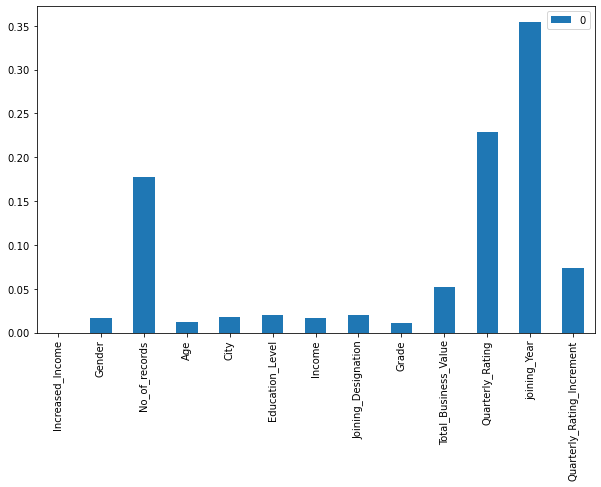

In [126]:
pd.DataFrame(data=xgb.feature_importances_,
            index=X.columns).plot(kind="bar",figsize=(10,6))

### GradientBoostingClassifier

In [127]:
def GradientBoostingClassifier(X, y):
    from sklearn.ensemble import  GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score , roc_auc_score,auc,recall_score,precision_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)

    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),'\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),'\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:,1], y_test)## GradientBoostingClassifier

In [128]:
probs , y_test = GradientBoostingClassifier(X,y)

Train Score :  0.914390756302521 

Test Score :  0.8909853249475891 

Accuracy Score :  0.8909853249475891 

[[125  23]
 [ 29 300]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9448061283167666 

precision score  test dataset:   0.9287925696594427 

Recall score  test dataset:   0.9118541033434651 

f1 score  test dataset :   0.9202453987730062 



In [129]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

def plot_roc(y_test,prob):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

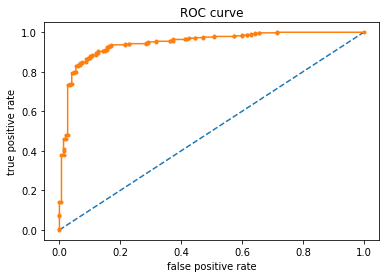

In [130]:
plot_roc(y_test , probs)

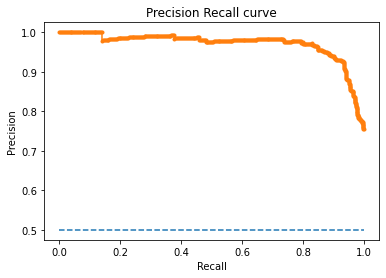

In [131]:
plot_pre_curve(y_test , probs)

## Inferences
#### Count of male drivers is twice of Female
#### Churn : distribution: 1616 (67.870%) 0 765 (32.12%)

- Probability of Churn is higher in case of education level 0 and 1 than 2.
- In case of joining designation 1, probability of churn is higher.
-  Drivers who saw a decrease in the last quarterly rating are more likely to churn
- Almost exponential increase in the churn rate can be observed from 2018 to 2020

Random Forest :¶
- train and test score : (0.914390756302521, 0.8763102725366876)
- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
- recall : 0.96
- precision: 0.91
- f1-score : 0.93

#### Random forest after gridsearch

- best_parameters :ccp_alpha=0.00075, max_depth=10, max_features=7,
                       n_estimators=300

- Gridsearch : 0.88

XGBoost Classifier: (Grid SEARCH CV : ) 'max_depth': 2, 'n_estimators': 100
- test Scores :

- Accuracy : 0.87

- f1 score : 0.90

- recall : 0.923

- precision : 0.884

- feature importance : highest is : joining year , followed by No of records available in data, and total business value.



#### GradientBoostingClassifier : GBDC:
- Train Score : 0.91
- Test Score : 0.89
- Accuracy Score : 0.89
- ROC-AUC score test dataset: 0.94
- precision score test dataset: 0.92
- Recall score test dataset: 0.91
- f1 score test dataset : 0.92

Based on the information provided in the sources, here are some actionable insights and recommendations for Ola based on the analysis of driver churn data:

## Actionable Insights:

1. Education level plays a significant role in churn rates, suggesting Ola should consider tailored retention strategies for drivers with lower education levels.
2. Drivers with low quarterly ratings exhibit higher churn rates, indicating the need for support programs to enhance driver ratings and overall satisfaction.
3. Churn rates were notably high in 2018 and 2019, prompting Ola to investigate the factors contributing to these peaks during those years.
4. Key model features impacting churn include 'joining year', 'total business value', highlighting areas for focused intervention and improvement.

5. Providing financial literacy training could benefit drivers, as increased income was linked to reduced churn rates.
6. Establishing a mentorship program pairing new drivers with experienced ones may enhance driver performance and retention.
7. Targeted communication and support for drivers with lower education levels could help mitigate churn.
8. Conducting regular feedback sessions and engagement activities can provide valuable insights into driver challenges and improve overall satisfaction.

9. Given the correlation between joining year and churn, reviewing the onboarding process for high-churn years is recommended.
10. Implementing mechanisms for drivers to express concerns about business opportunities could help match them with high-demand routes.
11. Analyzing peak business times and routes can optimize driver earnings and decrease churn likelihood.
12. Ensuring a fair benefits distribution system can enhance driver satisfaction and loyalty.

## Recommendations:

1. Address factors leading to lower ratings through training and support initiatives to improve driver performance.
2. Consider implementing a rewards program for drivers maintaining high ratings consistently.
3. Reach out to drivers who joined in high-churn years to understand their reasons for leaving and improve support mechanisms.
4. Offer tenure-based benefits or loyalty recognition to incentivize long-term driver engagement.
5. Encourage drivers to increase their total business value through milestone-based incentives.
6. Maintain robust data collection practices like  proper records of drivers enhances predictive modeling and address driver concerns effectively.

